In [30]:
# Import Necessary Modules
import matplotlib.pyplot as plt 
import numpy as np
import math
%matplotlib inline 

In [31]:
#  GAUSSIANCONTOUR(DATA,COLORMAP,GRIDPOINTS,COORDS) displays the contour 
#  plot for a bivariate Gaussian joint PDF with means, variances, and 
#  covariances taken from the sample means, variances, and covariances of
#  the column vectors of DATA, which is assumed to have two columns. 

#  The optional argument COLORMAP determines the colormap of the plot, which
#  may be cm.Reds, cm.Blues, or any other valid matplotlib colormap. cm.Blues is the default.
#  Example: gaussiancontour(data,cm.Reds) plots in red.
#
#  The optional argument GRIDPOINTS determines the number of evaluation
#  points per dimension for the joint PDF. The default is 200. 
#  Example: gaussiancontour(data,cm.Reds,100) uses 100 points per dimension.
#
#  The optional argument COORDS should be a 1 x 4 numpy array [XMIN,XMAX,YMIN,YMAX]
#  that determines the bounding box where the joint PDF is evaluated.
#  This can be helpful to set manually when plotting two or more contours
#  on the same figure, to ensure that they are evaluated over the same grid.
#  Example: gaussiancontour(data,cm.Reds,100,[1 2 -1 5]) evaluates the contour
#  over the box from 1 to 2 on the x-axis and -1 to 5 on the y-axis.

import math
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
import scipy.stats as stat

def gaussiancontour(data,plotcolor=cm.Blues,gridpoints=200,coords=None):
    xmin, ymin = np.amin(data, axis=0)
    xmax, ymax = np.amax(data, axis=0)
    if coords!=None:
        xmin = coords[0]
        xmax = coords[1]
        ymin = coords[2]
        ymax = coords[3]
    
    meanvector = np.mean(data, axis=0)
    covariancematrix = np.cov(data, rowvar=False)
    
    #generate grid points for joint pdf evaluation
    xpoints, ypoints = np.meshgrid(np.linspace(xmin,xmax,num=gridpoints),np.linspace(ymin,ymax,gridpoints));
    grid = np.empty(xpoints.shape + (2,))
    grid[:, :, 0] = xpoints
    grid[:, :, 1] = ypoints
    #evaluate joint Gaussian pdf at grid points
    fXY = stat.multivariate_normal.pdf(grid,meanvector,covariancematrix); 
    plt.contour(xpoints, ypoints, fXY, cmap=plotcolor, levels=10)

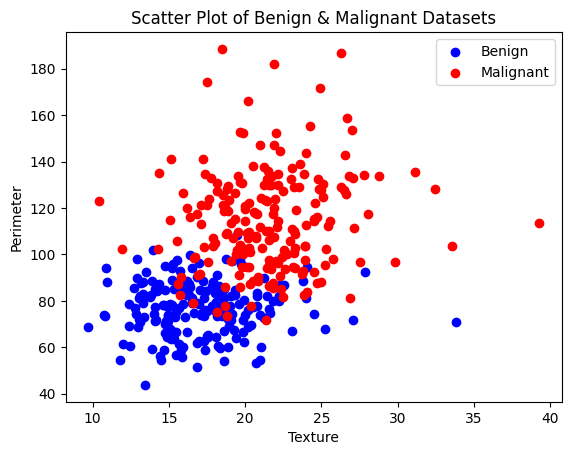

In [32]:
#part a.  Read the Benign and Malignant data sets, and plot a scatter plot with the benign values in blue, and malignant values in red
benign = np.genfromtxt("benigndata.csv", delimiter = ",")
malignant = np.genfromtxt("malignantdata.csv", delimiter = ",")

fig = plt.figure()
plt.scatter(benign[:,0], benign[:,1], color='b')
plt.scatter(malignant[:,0], malignant[:,1], color='r')

plt.xlabel('Texture')
plt.ylabel('Perimeter')
plt.legend(['Benign','Malignant'])
plt.title('Scatter Plot of Benign & Malignant Datasets')
plt.show()
fig.savefig('part_a.png')

In [33]:
#part b: Compute the average vector for the benign data, and for the malignant data.  In addition, compute the covariance matrix for the benign data, and the covariance matrix for the malignant data
benign_avg = np.mean(benign, axis=0)
malignant_avg = np.mean(malignant,axis=0)
benign_cov = np.cov(benign,rowvar=False)
malignant_cov = np.cov(malignant,rowvar=False)

print('Benign average vector: ' + str(benign_avg))
print('Malignant average vector: ' + str(malignant_avg))
print('Benign covariance matrix: ')
print(benign_cov)
print('Malignant covariance matrix: ')
print(malignant_cov)

Benign average vector: [17.1157  76.96375]
Malignant average vector: [ 21.4498  114.53195]
Benign covariance matrix: 
[[ 11.27652514   1.24857148]
 [  1.24857148 127.96211401]]
Malignant covariance matrix: 
[[ 13.89054569   8.66647627]
 [  8.66647627 472.34102382]]


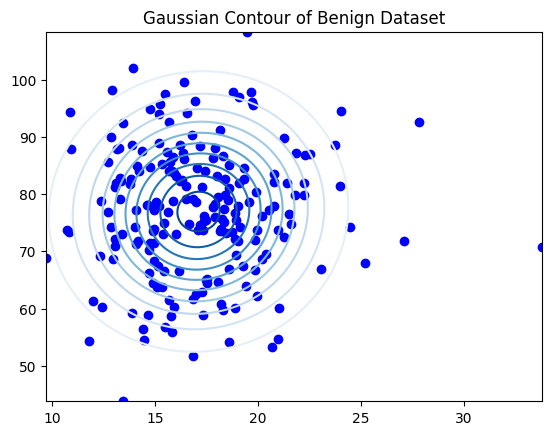

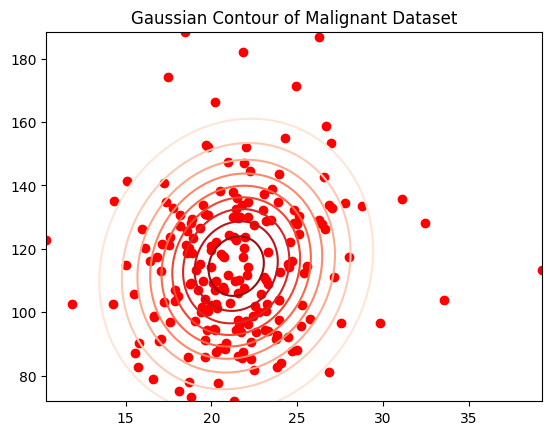

In [34]:
#part c: For the benign data set, do a scatter plot of the data in blue color.  Hold the figure, and call \texttt{gaussiancontour} with plotcolor "b" to add the Gaussian contour plot to the figure. 
# Release the hold on the figure, and repeat the process for the malignant data, using the color red this time.  The result should be two plots: The scatter plot of the benign data with the Gaussian 
#contours in blue, and the scatter plot of the malignant data with the Gaussian contours in red.
fig = plt.figure()
plt.scatter(benign[:,0], benign[:,1], color='b')
gaussiancontour(benign, cm.Blues, 200, None)
plt.title('Gaussian Contour of Benign Dataset')
plt.show()
fig.savefig('part_c_benign.png')

fig = plt.figure()
plt.scatter(malignant[:,0], malignant[:,1], color='r')
gaussiancontour(malignant, cm.Reds, 200, None)
plt.title('Gaussian Contour of Malignant Dataset')
plt.show()
fig.savefig('part_c_malignant.png')